In [204]:
import numpy as np
import math

In [205]:
M = [0.99,0,0,0,0.99,0.99,0.99,0,0.99,0.99,0.99,0,0.99,0,0.99,0.99,0,0,0,0.99,0.99,0,0,0,0.99]
O = [0,0.99,0.99,0.99,0,0,0.99,0,0.99,0,0,0.99,0,0.99,0,0,0.99,0,0.99,0,0,0.99,0.99,0.99,0]
L = [0,0.99,0,0,0,0,0.99,0,0,0,0,0.99,0,0,0,0,0.99,0,0,0,0,0.99,0.99,0.99,0]
E = [0,0.99,0.99,0.99,0,0,0.99,0,0,0,0,0.99,0.99,0.99,0,0,0.99,0,0,0,0,0.99,0.99,0.99,0]
O2 = [0.99,0.99,0.99,0.99,0.99,0.99,0,0,0,0.99,0.99,0,0,0,0.99,0.99,0,0,0,0.99,0.99,0.99,0.99,0.99,0.99]
O_blur = [0.2,0.2,0.2,0.2,0.2,0.4,0.1,0,0.1,0.4,0.4,0.1,0,0.1,0.4,0.4,0.1,0,0.1,0.4,0.2,0.2,0.2,0.2,0.2,]

In [237]:
import statistics 

def preprocessing(list_1):

    """returns a new list with its characters corrected for noise
    
    Args:
        list_1 (list): a list of integers representing a vector
        
    Returns: 
        char_processed (list): a new list corrected for noise
        
    """
    char_processed = np.copy(list_1)
 
    for i in range(len(char_processed)):     
        char_processed[i] = char_processed[i] - 0.1

    return char_processed

new_M = preprocessing(M)
new_O = preprocessing(O)
new_L = preprocessing(L)
new_E = preprocessing(E)
new_O2 = preprocessing(O2)
new_O_blur = preprocessing(O_blur)

In [238]:
def min_max_normalise (lst):
    normalised = []
    i = 0
    for i in range(len(lst)):
        minimum = min(lst)
        maximum = max(lst)
        value = (lst[i]-minimum) / (maximum-minimum)
        i += 1
        normalised.append(value)
    return normalised


In [232]:
import matplotlib.pyplot as plt

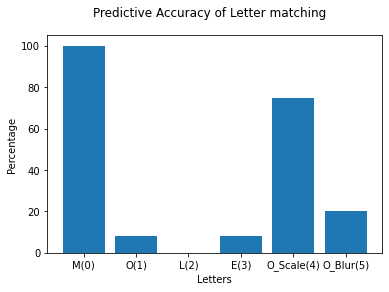

In [259]:
# so this function basically just compares the prepocessed letters to the neural network and plots the predictive
# percentages. (how sure it is). besides the preprocessing function, and the standardising function, 
# this is all we need. the rest is just for explaining what actually happens. 


def plot(data_):
    data_ = min_max_normalise(data_)
    Letters = ['M(0)', 'O(1)', 'L(2)', 'E(3)', 'O_Scale(4)', 'O_Blur(5)']
    percent = []
    precentage = []

    matmul_data = np.matmul(NN,data_)
    normalized_matmul = (min_max_normalise(matmul_data))
        
    for i in normalized_matmul:
        i = i*100
        percent.append(i)
    
        
  
    data_ = min_max_normalise(data_)

    Letter_dict = {Letters[i]: percent[i] for i in range(len(Letters))}
    alpha = list(Letter_dict.keys())
    nums = list(Letter_dict.values())

    fig, ax = plt.subplots()
    ax.bar(alpha, nums)
    fig.suptitle('Predictive Accuracy of Letter matching')
    ax.set_xlabel('Letters')
    ax.set_ylabel('Percentage')
    
plot(new_M)

In [ ]:
### all that is following is not necessarilly needed atm and is more for own comprehension 

In [ ]:
print(str(np.dot(M,M))+'\t'+str(np.dot(O,M))+'\t'+str(np.dot(L,M))+'\t'+str(np.dot(E,M))+'\t'+str(np.dot(O2,M))+'\t'+str(np.dot(O_blur,M)))
print(str(np.dot(M,O))+'\t'+str(np.dot(O,O))+'\t'+str(np.dot(L,O))+'\t'+str(np.dot(E,O))+'\t'+str(np.dot(O2,O))+'\t'+str(np.dot(O_blur,O)))
print(str(np.dot(M,L))+'\t'+str(np.dot(O,L))+'\t'+str(np.dot(L,L))+'\t'+str(np.dot(E,L))+'\t'+str(np.dot(O2,L))+'\t'+str(np.dot(O_blur,L)))
print(str(np.dot(M,E))+'\t'+str(np.dot(O,E))+'\t'+str(np.dot(L,E))+'\t'+str(np.dot(E,E))+'\t'+str(np.dot(O2,E))+'\t'+str(np.dot(O_blur,E)))
print(str(np.dot(M,O2))+'\t'+str(np.dot(O,O2))+'\t'+str(np.dot(L,O2))+'\t'+str(np.dot(E,O2))+'\t'+str(np.dot(O2,O2))+'\t'+str(np.dot(O_blur,O2)))
print(str(np.dot(M,O_blur))+'\t'+str(np.dot(O,O_blur))+'\t'+str(np.dot(L,O_blur))+'\t'+str(np.dot(E,O_blur))+'\t'+str(np.dot(O2,O_blur))+'\t'+str(np.dot(O_blur,O_blur)))

In [ ]:
print(str(np.dot(new_M,new_M))+'\t'+str(np.dot(new_O,new_M))+'\t'+str(np.dot(new_L,new_M))+'\t'+str(np.dot(new_E,new_M))+'\t'+str(np.dot(new_O2,new_M))+'\t'+str(np.dot(new_O_blur,new_M)))
print(str(np.dot(new_M,new_O))+'\t'+str(np.dot(new_O,new_O))+'\t'+str(np.dot(new_L,new_O))+'\t'+str(np.dot(new_E,new_M))+'\t'+str(np.dot(new_O2,new_M))+'\t'+str(np.dot(new_O_blur,new_M)))
print(str(np.dot(new_M,new_L))+'\t'+str(np.dot(new_O,new_L))+'\t'+str(np.dot(new_L,new_L))+'\t'+str(np.dot(new_E,new_M))+'\t'+str(np.dot(new_O2,new_M))+'\t'+str(np.dot(new_O_blur,new_M)))
print(str(np.dot(new_M,new_E))+'\t'+str(np.dot(new_O,new_E))+'\t'+str(np.dot(new_L,new_E))+'\t'+str(np.dot(new_E,new_E))+'\t'+str(np.dot(new_O2,new_M))+'\t'+str(np.dot(new_O_blur,new_M)))
print(str(np.dot(new_M,new_O2))+'\t'+str(np.dot(new_O,new_O2))+'\t'+str(np.dot(new_L,new_O2))+'\t'+str(np.dot(new_E,new_O2))+'\t'+str(np.dot(new_O2,new_O2))+'\t'+str(np.dot(new_O_blur,new_M)))
print(str(np.dot(new_M,new_O_blur))+'\t'+str(np.dot(new_O,new_O_blur))+'\t'+str(np.dot(new_L,new_O_blur))+'\t'+str(np.dot(new_E,new_O_blur))+'\t'+str(np.dot(new_O2,new_O_blur))+'\t'+str(np.dot(new_O_blur,new_O_blur)))

In [ ]:
def matmul(data):
    
    """returns a list of floats that represents similarity to letters
    
    Args: 
        data (list): a list representing weights for each cell in the matrix (vector) letter
        
    Returns: 
        percentage (list): a list where each value represents the similarity between data and the NN. 
    """
    
    NN = [new_M,new_O,new_L,new_E,new_O2,new_O_blur]
    percentage = np.matmul(NN,data)
    
    return percentage
    

    
print(matmul(new_M))
print(matmul(new_O))
print(matmul(new_L))
print(matmul(new_E))
print(matmul(new_O2))
print(matmul(new_O_blur))



In [ ]:
print(np.argmax(np.matmul(NN,new_O)))
print(np.argmax(np.matmul(NN,new_M)))
print(np.argmax(np.matmul(NN,new_L)))
print(np.argmax(np.matmul(NN,new_E)))
print(np.argmax(np.matmul(NN,new_E)))
print(np.argmax(np.matmul(NN,new_O2)))
print(np.argmax(np.matmul(NN,new_O_blur)))